# ⚡ Classificação de Doença Cardíaca com AdaBoost

## 🩺 Sobre o Dataset

Este projeto usa o **Heart Disease Dataset (Cleveland)** da UCI, com dados clínicos de pacientes. O objetivo é prever a presença de **doença cardíaca** com base em exames médicos.

- **Variável-alvo (`target`)**:
  - `0`: Sem doença cardíaca
  - `1`: Com doença cardíaca

---

## 🚀 Pipeline do Projeto

| Etapa | Descrição |
|-------|-----------|
| 📥 1. Carregamento | Importação e limpeza dos dados |
| 📊 2. Pré-processamento | Conversão da variável-alvo para binária |
| 🔀 3. Split dos dados | Treino (80%) / Teste (20%) |
| 🔍 4. Cross-validation | Escolha do melhor `n_estimators` (10 a 300) |
| 🤖 5. Treinamento | Modelo AdaBoostClassifier |
| 📈 6. Avaliação | Geração de métricas e visualizações de desempenho |

---

## 📊 Régua Visual de Avaliação de Métricas de Classificação

| Métrica     | O que mede                                               | Quando usar                                                                 | Interpretação (Régua de Qualidade) |
|-------------|----------------------------------------------------------|------------------------------------------------------------------------------|------------------------------------|
| **🎯 Acurácia** | Proporção total de acertos (positivos e negativos)     | Quando as classes estão **bem balanceadas**                                | ✅ > 0.85 (excelente)<br>🟡 0.75–0.85 (ok)<br>🔴 < 0.75 (baixo) |
| **🎯 Precision** | % de positivos previstos que são realmente positivos  | Quando **falsos positivos são mais graves** (ex: crédito, prisões)         | ✅ > 0.80 (alta confiança)<br>🟡 0.65–0.80 (cuidado)<br>🔴 < 0.65 (alerta de ruído) |
| **🎯 Recall** | % de positivos reais identificados corretamente         | Quando **falsos negativos são mais graves** (ex: doenças, fraudes)         | ✅ > 0.80 (ótima cobertura)<br>🟡 0.65–0.80 (aceitável)<br>🔴 < 0.65 (perigo de omissão) |
| **🎯 F1-Score** | Equilíbrio entre Precision e Recall                    | Quando FP e FN têm **peso similar** ou dados estão desbalanceados          | ✅ > 0.80 (robusto)<br>🟡 0.70–0.80 (ok)<br>🔴 < 0.70 (desequilíbrio crítico) |
| **📈 AUC (ROC)** | Capacidade geral de separação das classes             | Para avaliar **modelo em vários thresholds** (independe de corte)          | ✅ > 0.90 (excelente)<br>🟡 0.80–0.90 (bom)<br>🔴 < 0.80 (fraco ou aleatório) |
| **📈 GINI**    | Variante do AUC: `2*AUC - 1`                            | Muito usado em **score de crédito, churn, risco**                          | ✅ > 0.60 (ótimo)<br>🟡 0.40–0.60 (moderado)<br>🔴 < 0.40 (baixa separação) |
| **📉 KS**      | Distância entre distribuições acumuladas               | Ideal para **modelos de crédito, retenção, churn**                         | ✅ > 0.60 (separação excelente)<br>🟡 0.40–0.60 (adequado)<br>🟠 0.20–0.40 (fraco)<br>🔴 < 0.20 (quase aleatório) |

---

### 🧠 Dicas práticas para leitura

- Use **Recall** quando *não pode perder nenhum caso positivo* (ex: câncer, fraude).
- Use **Precision** quando *não pode acusar ninguém à toa* (ex: crédito, justiça).
- Use **F1-Score** em **classes desbalanceadas**.
- Use **AUC / GINI / KS** para **avaliar a separabilidade geral** dos scores.
- **Acurácia isolada pode enganar** – sempre combine com outras métricas!

📌 *Recomendado: mantenha pelo menos F1 > 0.75 e AUC > 0.80 para modelos produtivos.*

---

## 📘 Como Ler os Resultados

- **Alta acurácia não é tudo** → avalie também Recall e Precision.
- **Baixo Recall** → o modelo está **perdendo muitos pacientes com doença cardíaca**.
- **Baixa Precision** → o modelo está **acusando doença em pacientes saudáveis**.
- **F1-score** ajuda a equilibrar essas duas visões.
- **AUC e GINI** mostram o quão bem o modelo **separa as classes** independente de limiar.
- **KS** mostra se há **uma boa separação de escores** entre as classes (quanto maior, melhor).

---

## 📷 Visualizações Geradas

- 🔵 Matriz de Confusão
- 🟠 Curva ROC (com AUC)
- 🟣 Curva Precision-Recall
- 📈 Validação cruzada (melhor n_estimators)
- 📉 Métricas KS e GINI

---

## 🛠️ Requisitos

```bash
pip install numpy pandas scikit-learn seaborn matplotlib


📌 Primeiras 5 linhas do dataset Heart Disease:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0   

📌 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-nul

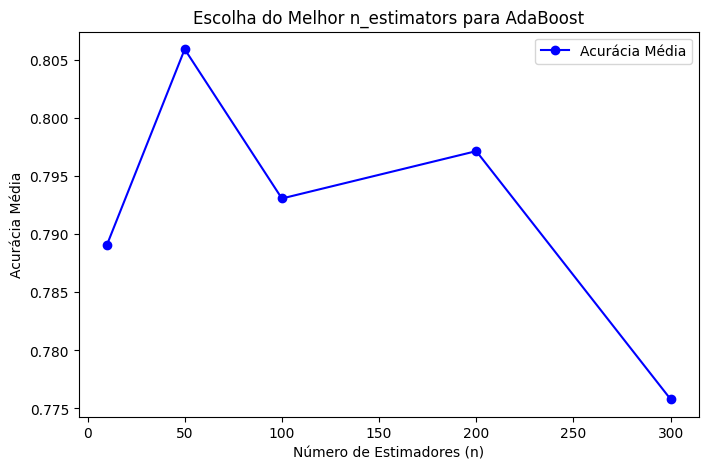

✅ Acurácia no Treino: 0.90
✅ Acurácia no Teste: 0.87

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



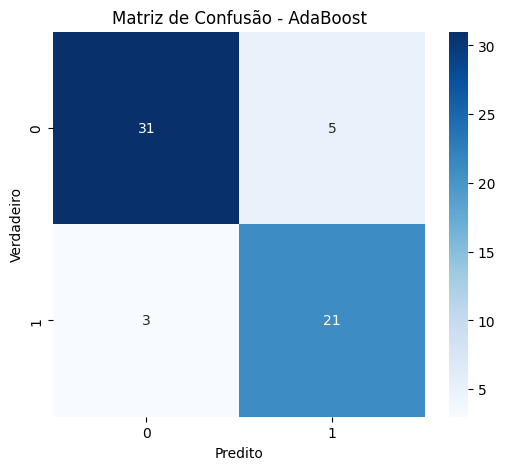

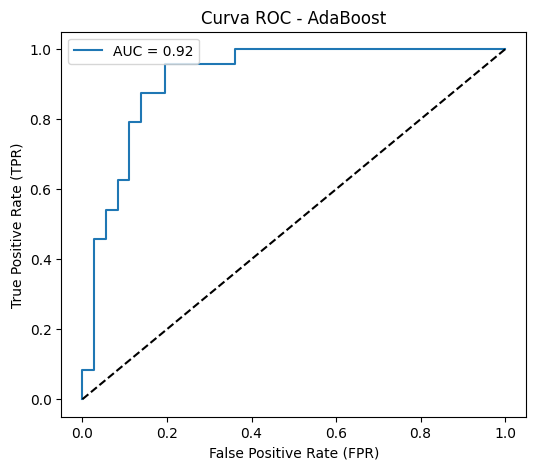

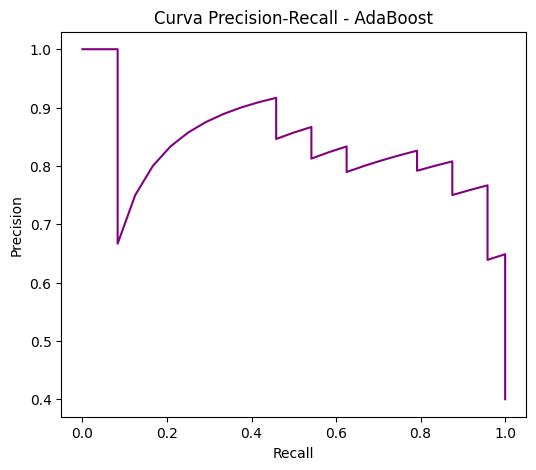

KS: 0.76
GINI: 0.83


In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_recall_curve
)
from scipy.stats import ks_2samp

# 🔹 Função para carregar o dataset Heart Disease
def carregar_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    colunas = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ]
    df_heart = pd.read_csv(url, names=colunas, na_values='?')
    df_heart.dropna(inplace=True)  # Remover valores ausentes

    print("📌 Primeiras 5 linhas do dataset Heart Disease:")
    print(df_heart.head(), "\n")

    print("📌 Informações do dataset:")
    print(df_heart.info(), "\n")

    print("📌 Estatísticas descritivas do dataset:")
    print(df_heart.describe(), "\n")

    X = df_heart.drop(columns=['target'])
    y = df_heart['target'].apply(lambda x: 1 if x > 0 else 0)

    return X, y

# 🔹 Função para encontrar o melhor n_estimators
def encontrar_melhor_n_estimators(X_train, y_train):
    n_values = [10, 50, 100, 200, 300]
    scores = []

    for n in n_values:
        model = AdaBoostClassifier(n_estimators=n)
        score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
        scores.append(score)

    melhor_n = n_values[np.argmax(scores)]

    plt.figure(figsize=(8, 5))
    plt.plot(n_values, scores, marker='o', linestyle='-', color='b', label="Acurácia Média")
    plt.xlabel("Número de Estimadores (n)")
    plt.ylabel("Acurácia Média")
    plt.title("Escolha do Melhor n_estimators para AdaBoost")
    plt.legend()
    plt.show()

    return melhor_n

# 🔹 Função para treinar e avaliar o modelo AdaBoost com métricas adicionais
def treinar_avaliar_ada(X_train, X_test, y_train, y_test, melhor_n):
    modelo = AdaBoostClassifier(n_estimators=melhor_n)
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    # Acurácias
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred)

    print(f"✅ Acurácia no Treino: {acc_train:.2f}")
    print(f"✅ Acurácia no Teste: {acc_test:.2f}\n")

    if acc_train - acc_test > 0.10:
        print("⚠️ Atenção: Possível Overfitting detectado!")

    # Métricas básicas
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - AdaBoost")
    plt.show()

    # Curva ROC e AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Curva ROC - AdaBoost")
    plt.legend()
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='purple')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall - AdaBoost")
    plt.show()

    # KS
    ks_stat = ks_2samp(y_prob[y_test == 1], y_prob[y_test == 0]).statistic
    print(f"KS: {ks_stat:.2f}")

    # GINI
    gini = 2 * auc_score - 1
    print(f"GINI: {gini:.2f}")

# 🚀 Fluxo principal
if __name__ == "__main__":
    X, y = carregar_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    melhor_n = encontrar_melhor_n_estimators(X_train, y_train)
    treinar_avaliar_ada(X_train, X_test, y_train, y_test, melhor_n)
